# ** proper thign for findign out if we see codon usage bias ** 
    1) i simulate a string oc coding sequence (long one, maybe that 40k one a while back?) 
    2) randomize the synonymous cites 
    3) run 

** load in the data ** 

In [148]:
import json 
import random
import numpy as np
import matplotlib.pyplot as plt

In [182]:
model = {'GTC': [0.38170347003154576, {'GCC': 0.581267217630854, 'GGC': 0.17447199265381083, 'GAC': 0.24426078971533516}], 'TGA': [0.44338655339094774, {'TAA': 0.6247109349190618, 'TTA': 0.12685827552031714, 'TCA': 0.2484307895606211}], 'TAT': [0.544423228125351, {'TTT': 0.12131215184650299, 'TGT': 0.8021456571074892, 'TCT': 0.07654219104600785}], 'CGC': [0.9428571428571428, {'CTC': 0.06703397612488522, 'CCC': 0.027548209366391185, 'CAC': 0.9054178145087236}], 'ATT': [0.48758198043221157, {'AGT': 0.1133406835722161, 'ACT': 0.7592061742006616, 'AAT': 0.1274531422271224}], 'GCA': [0.49819102749638206, {'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083, 'GGA': 0.15359477124183007}], 'CGT': [0.9583888149134487, {'CTT': 0.04341785342132685, 'CCT': 0.03403959708232025, 'CAT': 0.922542549496353}], 'CCA': [0.4589957500393515, {'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226, 'CAA': 0.10185185185185185}], 'GGA': [0.5196784458214705, {'GTA': 0.17015791169835642, 'GAA': 0.602964872703835, 'GCA': 0.22687721559780857}], 'AAA': [0.3198252625708709, {'ACA': 0.2961348445219413, 'ATA': 0.17988956698634118, 'AGA': 0.5239755884917175}], 'AAC': [0.3978541712283775, {'ACC': 0.17776554760594387, 'AGC': 0.6692350027517887, 'ATC': 0.15299944964226747}], 'CTC': [0.3202682875707399, {'CGC': 0.21662303664921467, 'CCC': 0.5530104712041884, 'CAC': 0.23036649214659685}], 'AGG': [0.5123493090267568, {'ACG': 0.22955523672883785, 'AAG': 0.6662840746054519, 'ATG': 0.10416068866571017}], 'AGA': [0.4717741935483871, {'ACA': 0.34816490698843644, 'AAA': 0.47611865258924085, 'ATA': 0.1757164404223228}], 'AGC': [0.5081906865451868, {'ACC': 0.20101412531691415, 'AAC': 0.6356392611372691, 'ATC': 0.16334661354581673}], 'CAA': [0.36173285198555954, {'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296, 'CCA': 0.28493013972055886}], 'CTT': [0.35645079041305455, {'CGT': 0.2341440152598951, 'CCT': 0.6132570338578922, 'CAT': 0.15259895088221268}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'TAG': [0.38808618504435993, {'TCG': 0.16525146962769433, 'TGG': 0.6962769431743958, 'TTG': 0.13847158719790986}], 'ACA': [0.5516478655164787, {'ATA': 0.6555733761026463, 'AGA': 0.17802726543704891, 'AAA': 0.16639935846030474}], 'CTG': [0.4073735527117611, {'CGG': 0.20905011219147346, 'CAG': 0.1480927449513837, 'CCG': 0.6428571428571429}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'ATT': 0.5964467005076142, 'AAT': 0.1551043429216018}], 'TTA': [0.3860215053763441, {'TGA': 0.20533227218463987, 'TAA': 0.22682053322721846, 'TCA': 0.5678471945881417}], 'CGA': [0.9197916666666667, {'CTA': 0.026896942242355604, 'CAA': 0.9210079275198187, 'CCA': 0.052095130237825596}], 'GTA': [0.4143262045864468, {'GGA': 0.12686567164179105, 'GAA': 0.1455223880597015, 'GCA': 0.7276119402985075}], 'GGC': [0.5527913809990206, {'GCC': 0.1630049610205528, 'GTC': 0.23848334514528702, 'GAC': 0.5985116938341601}], 'AGT': [0.5261127596439169, {'ATT': 0.1551043429216018, 'ACT': 0.24844895657078397, 'AAT': 0.5964467005076142}], 'AAT': [0.48758198043221157, {'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224, 'ACT': 0.1133406835722161}], 'CCG': [0.943577893317928, {'CTG': 0.943265306122449, 'CGG': 0.04673469387755102, 'CAG': 0.01}], 'ACC': [0.6345660930062248, {'AAC': 0.3147720715522216, 'ATC': 0.532602423542989, 'AGC': 0.15262550490478938}], 'TCC': [0.5196784458214705, {'TTC': 0.602964872703835, 'TGC': 0.22687721559780857, 'TAC': 0.17015791169835642}], 'TCT': [0.4717741935483871, {'TTT': 0.47611865258924085, 'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228}], 'CAG': [0.4073735527117611, {'CTG': 0.1480927449513837, 'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346}], 'TTG': [0.36173285198555954, {'TCG': 0.5768463073852296, 'TGG': 0.28493013972055886, 'TAG': 0.13822355289421157}], 'ATC': [0.4466903598400711, {'ACC': 0.5862754848334162, 'AAC': 0.2973644952759821, 'AGC': 0.11636001989060167}], 'CGG': [0.943577893317928, {'CTG': 0.01, 'CAG': 0.943265306122449, 'CCG': 0.04673469387755102}], 'TTC': [0.30323054331864907, {'TGC': 0.2391041162227603, 'TCC': 0.5617433414043583, 'TAC': 0.19915254237288135}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ATG': [0.5741935483870968, {'ACG': 0.716724286949006, 'AAG': 0.1497407087294728, 'AGG': 0.13353500432152118}], 'GGT': [0.6345660930062248, {'GTT': 0.3147720715522216, 'GCT': 0.15262550490478938, 'GAT': 0.532602423542989}], 'TGC': [0.49819102749638206, {'TTC': 0.24473493100944083, 'TCC': 0.15359477124183007, 'TAC': 0.6016702977487292}], 'GTG': [0.3995351785336996, {'GAG': 0.18244315177154943, 'GCG': 0.6139608672659969, 'GGG': 0.20359598096245374}], 'GGG': [0.5453669813138123, {'GAG': 0.6450017661603674, 'GTG': 0.11974567290709998, 'GCG': 0.2352525609325327}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'TGG': [0.4589957500393515, {'TCG': 0.20781893004115226, 'TTG': 0.10185185185185185, 'TAG': 0.6903292181069959}], 'GAA': [0.30323054331864907, {'GTA': 0.19915254237288135, 'GGA': 0.5617433414043583, 'GCA': 0.2391041162227603}], 'GAC': [0.38170347003154576, {'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516, 'GGC': 0.581267217630854}], 'TAC': [0.4143262045864468, {'TTC': 0.1455223880597015, 'TGC': 0.7276119402985075, 'TCC': 0.12686567164179105}], 'GAT': [0.4466903598400711, {'GTT': 0.2973644952759821, 'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162}], 'ATA': [0.544423228125351, {'ACA': 0.8021456571074892, 'AAA': 0.12131215184650299, 'AGA': 0.07654219104600785}], 'GCT': [0.5081906865451868, {'GTT': 0.6356392611372691, 'GGT': 0.20101412531691415, 'GAT': 0.16334661354581673}], 'CAT': [0.5741935483870968, {'CTT': 0.1497407087294728, 'CGT': 0.716724286949006, 'CCT': 0.13353500432152118}], 'CTA': [0.38808618504435993, {'CGA': 0.16525146962769433, 'CAA': 0.13847158719790986, 'CCA': 0.6962769431743958}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'TTT': [0.3198252625708709, {'TCT': 0.5239755884917175, 'TGT': 0.2961348445219413, 'TAT': 0.17988956698634118}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TTG': 0.9210079275198187, 'TAG': 0.026896942242355604}], 'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GTT': [0.3978541712283775, {'GCT': 0.6692350027517887, 'GGT': 0.17776554760594387, 'GAT': 0.15299944964226747}], 'TCA': [0.44338655339094774, {'TAA': 0.12685827552031714, 'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CGC': 0.2352525609325327, 'CAC': 0.11974567290709998}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}], 'GCG': [0.9428571428571428, {'GAG': 0.06703397612488522, 'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185}], 'GCC': [0.5527913809990206, {'GTC': 0.5985116938341601, 'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702}], 'TGT': [0.5516478655164787, {'TCT': 0.17802726543704891, 'TAT': 0.6555733761026463, 'TTT': 0.16639935846030474}]}


In [6]:
# import thee files associated with the long ass coding seqeunce region 

cds_pos_dictionary = open("DifDNA_Trial4_exon_insertion_dict.txt").readlines()[0]
cds_pos_dictionary = json.loads(cds_pos_dictionary)

cds_seq_dictionary = open("DifDNA_Trial4_exons_toUseSeqeunce_dict.txt").readlines()[0]
cds_seq_dictionary = json.loads(cds_seq_dictionary)

In [7]:
cds_pos_dictionary

{'ENST00000340834.10': [136859, 144890],
 'ENST00000342175.11': [38836, 120193],
 'ENST00000400822.7': [16665, 22170]}

In [14]:
cds = cds_seq_dictionary["ENST00000342175.11"][0]

In [29]:
SynonymousCodons = {'CYS': ['TGT', 'TGC'], 'ASP': ['GAT', 'GAC'],
'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'],
'GLN': ['CAA', 'CAG'], 'MET': ['ATG'], 'ASN': ['AAC', 'AAT'],
'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 'LYS': ['AAG', 'AAA'],
'STOP': ['TAG', 'TGA', 'TAA'], 'THR': ['ACC', 'ACA', 'ACG', 'ACT'],
'PHE': ['TTT', 'TTC'], 'ALA': ['GCA', 'GCC', 'GCG', 'GCT'],
'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 'ILE': ['ATC', 'ATA', 'ATT'],
'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 'HIS': ['CAT', 'CAC'],
'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 'TRP': ['TGG'],
'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 'GLU': ['GAG', 'GAA'], 'TYR': ['TAT', 'TAC']}

get_aa_dict = {}
for key,value in SynonymousCodons.items(): 
    for codon in value: 
        get_aa_dict[codon] = key 

print(get_aa_dict)

{'TAC': 'TYR', 'CGT': 'ARG', 'GCT': 'ALA', 'AGA': 'ARG', 'GAT': 'ASP', 'AGT': 'SER', 'GTT': 'VAL', 'CAA': 'GLN', 'TGT': 'CYS', 'CAC': 'HIS', 'GCC': 'ALA', 'CTG': 'LEU', 'GGA': 'GLY', 'CCT': 'PRO', 'AGC': 'SER', 'TGA': 'STOP', 'GTG': 'VAL', 'GCA': 'ALA', 'TAA': 'STOP', 'AAG': 'LYS', 'TTG': 'LEU', 'ACA': 'THR', 'TCG': 'SER', 'CTA': 'LEU', 'TCT': 'SER', 'GGT': 'GLY', 'CCC': 'PRO', 'ATT': 'ILE', 'CGC': 'ARG', 'CGG': 'ARG', 'TTT': 'PHE', 'TCC': 'SER', 'AAT': 'ASN', 'TAT': 'TYR', 'GAA': 'GLU', 'TGG': 'TRP', 'GAC': 'ASP', 'AGG': 'ARG', 'ACG': 'THR', 'GGG': 'GLY', 'CCA': 'PRO', 'GGC': 'GLY', 'ATC': 'ILE', 'AAC': 'ASN', 'TCA': 'SER', 'GTC': 'VAL', 'TTC': 'PHE', 'CCG': 'PRO', 'ATA': 'ILE', 'TAG': 'STOP', 'ATG': 'MET', 'GTA': 'VAL', 'AAA': 'LYS', 'CTC': 'LEU', 'CAT': 'HIS', 'ACC': 'THR', 'GCG': 'ALA', 'TGC': 'CYS', 'CAG': 'GLN', 'CTT': 'LEU', 'GAG': 'GLU', 'CGA': 'ARG', 'ACT': 'THR', 'TTA': 'LEU'}


In [26]:
del(triplets)

In [30]:
codons= []
for i in range(0,len(cds),3): 
    codon  = cds[i:i+3]
    codons.append(codon)

print(cds[-10:])
print(codons[-10:])

ATCCATTTAA
['ACT', 'GTG', 'AAT', 'ATA', 'CAT', 'ATT', 'CGA', 'TCC', 'ATT', 'TAA']


In [38]:
new_dna = str()
new_codons = []
for codon in codons: 
    aa = get_aa_dict[codon]
    new_codon = random.choice(SynonymousCodons[aa])
    new_codons.append(new_codon)
    new_dna += new_codon

In [39]:
counter = 0
for i in range(len(codons)): 
    if codons[i] != new_codons[i]: 
        counter += 1

In [42]:
len(codons)

27119

In [41]:
counter

17678

In [37]:
new_dna[0:100]

'ATGACTACCCAAGCTCCAACCTTTACACAGCCATTGCAAAGTGTGGTTGTATTGGAGGGGAGTACGGCTACGTTTGAAGCTCACATCAGCGGTTTTCCGG'

In [44]:
#checking counts are relatively random 
for codon in get_aa_dict.keys():
    count = new_codons.count(codon)
    prop = count / len(codons)
    print(codon, count, prop, sep = "\t")

TAC	423	0.01559792027729636
CGT	225	0.008296766104944873
GCT	422	0.015561045761274383
AGA	228	0.008407389653010805
GAT	739	0.02725026734024116
AGT	315	0.011615472546922821
GTT	612	0.022567203805450055
CAA	396	0.014602308344702976
TGT	182	0.006711161915999853
CAC	200	0.007374903204395442
GCC	407	0.015007928020944725
CTG	305	0.01124672738670305
GGA	438	0.016151038017626018
CCT	430	0.015856041889450202
AGC	332	0.012242339319296434
TGA	1	3.687451602197721e-05
GTG	591	0.021792838968988534
GCA	421	0.015524171245252407
TAA	0	0.0
AAG	1078	0.03975072827169143
TTG	263	0.009697997713780007
ACA	546	0.020133485747999558
TCG	334	0.012316088351340388
CTA	277	0.010214240938087687
TCT	318	0.011726096094988753
GGT	414	0.015266049633098565
CCC	464	0.017109775434197425
ATT	555	0.02046535639219735
CGC	246	0.009071130941406394
CGG	237	0.008739260297208598
TTT	340	0.012537335447472252
TCC	311	0.011467974482834913
AAT	424	0.01563479479331834
TAT	410	0.015118551569010657
GAA	1161	0.04281131310151554
TGG	402	0.

In [84]:
new_dna_map = cds = cds_seq_dictionary["ENST00000342175.11"][1]

In [78]:
len(new_dna) 

81357

In [85]:
# di the invariant sites thing 
invarSitesIndices = random.sample(range(0, len(codons)), int(len(codons)/2))
for codon_index in invarSitesIndices: 
    adj_codon_index = codon_index*3
    new_dna_map = new_dna_map[:adj_codon_index]+"333"+new_dna_map[adj_codon_index+3:]

In [80]:
invarSitesIndices[-1]

1582

In [81]:
codon_index

1582

In [82]:
adj_codon_index

4746

In [86]:

new_dna_map[0:100]

'0123333330123330120120123330123330120120123333330123333333330123333330120120120120120123333330120120'

In [87]:
file = open("CodingUsage_DNA_gen0.txt", "w+")
file.write(str(new_dna))
file.close()

file = open("CodingUsage_DNA_map.txt", "w+")
file.write(str(new_dna_map))
file.close()

In [65]:
range(0,10,3)

range(0, 10, 3)

# ** plotting codon usage bias ** 

In [107]:
# importing dna 
DNAI = open("CodingUsage_DNA_gen0.txt").readlines()[0]
initial_codons = []
for i in range(1, len(DNAI), 3): 
    codon = DNAI[i-1:i+2]
    initial_codons.append(codon)

In [108]:
print(DNAI[:10])
print(initial_codons[0:10])

ATGACGACGC
['ATG', 'ACG', 'ACG', 'CAG', 'GCT', 'CCT', 'ACC', 'TTC', 'ACG', 'CAA']


In [101]:
nTrial = 9
DNAF_dict = {}
for trial_name in ["Trial"+str(n) for n in range(1,nTrial+1)]: 
    dnaf = open("Nonsyn_output/CodonUsage_{t}_DNA_final_cds_invariant50_800000.txt".format(t=trial_name)).readlines()[0]
    codons = []
    for i in range(1, len(dnaf)-1,3): 
        codon = dnaf[i-1:i+2]
        codons.append(codon)
    DNAF_dict[trial_name] = [dnaf , codons]

In [109]:
print(DNAF_dict["Trial1"][0][-10:])
print(DNAF_dict["Trial1"][1][-10:])

ATCCATTTGA
['ACT', 'GTT', 'AAC', 'CTA', 'CAC', 'ATA', 'CAA', 'TCC', 'ATT', 'TGA']


In [122]:
codon_countf_dict = {}
for codon in get_aa_dict.keys(): #all codons are keys 
    counts_list = []
    for trial_name in ["Trial"+str(n) for n in range(1,nTrial+1)]:
        countf = DNAF_dict[trial_name][1].count(codon)
        counts_list.append(countf)

    codon_countf_dict[codon] = counts_list

In [133]:
codon_counti_dict = {}
for codon in get_aa_dict.keys():
    counti = initial_codons.count(codon)
    codon_counti_dict[codon] = counti

In [123]:
codon_countf_dict

{'AAA': [920, 906, 953, 955, 927, 947, 884, 933, 936],
 'AAC': [535, 529, 538, 546, 565, 529, 510, 516, 540],
 'AAG': [774, 776, 778, 796, 783, 777, 792, 762, 800],
 'AAT': [548, 561, 553, 540, 537, 562, 572, 544, 512],
 'ACA': [670, 598, 629, 625, 623, 627, 653, 638, 633],
 'ACC': [449, 421, 430, 412, 428, 415, 432, 422, 414],
 'ACG': [429, 434, 423, 429, 423, 452, 416, 434, 439],
 'ACT': [554, 593, 583, 557, 550, 566, 551, 579, 583],
 'AGA': [344, 346, 335, 320, 351, 325, 329, 348, 350],
 'AGC': [334, 360, 338, 326, 368, 349, 358, 342, 358],
 'AGG': [278, 283, 286, 280, 265, 258, 280, 259, 269],
 'AGT': [483, 468, 499, 449, 462, 440, 478, 458, 443],
 'ATA': [565, 584, 567, 606, 558, 565, 570, 585, 566],
 'ATC': [484, 456, 467, 455, 464, 476, 473, 456, 468],
 'ATG': [425, 425, 439, 449, 441, 452, 441, 437, 445],
 'ATT': [606, 571, 597, 597, 614, 586, 598, 604, 641],
 'CAA': [580, 556, 582, 588, 568, 528, 586, 570, 544],
 'CAC': [349, 412, 343, 367, 352, 363, 376, 356, 348],
 'CAG': [4

In [130]:
len(DNAI)/3

27119.0

In [134]:
sum(codon_counti_dict.values())

27119

In [171]:
change_mean = []
change_se = []
codons = []
codon_usage = []
for key,value in codon_countf_dict.items(): 
    counti = codon_counti_dict[key]
    change_list = []
    for count in value: 
        if counti != 0:
            change = (count - counti)/counti
            change_list.append(change)
        if counti == 0: 
            change = (count - counti)
            change_list.append(change)
    
    codons.append(key)
    change_mean.append(round(np.mean(change_list),2))
    change_se.append(round(np.std(change_list)/np.sqrt(nTrial),2))
    codon_usage.append(codon_usage_dict[key])

In [172]:
print(codons[0:20])
print(change_mean[0:20])
print(change_se[0:20])
print(codon_usage[0:20])

['TAC', 'CGT', 'GCT', 'AGA', 'GAT', 'GCC', 'CAA', 'TGT', 'CAC', 'GAG', 'ACG', 'ACC', 'CCT', 'GCG', 'TGA', 'GTG', 'GGC', 'TAA', 'AAG', 'TTG']
[0.14000000000000001, 0.26000000000000001, -0.089999999999999997, 0.48999999999999999, -0.22, -0.27000000000000002, 0.42999999999999999, 1.4199999999999999, 0.81000000000000005, -0.35999999999999999, -0.16, -0.17000000000000001, -0.14999999999999999, -0.27000000000000002, 0.0, -0.11, -0.23000000000000001, 0.0, -0.27000000000000002, 0.66000000000000003]
[0.02, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.040000000000000001, 0.029999999999999999, 0.0, 0.01, 0.01, 0.01, 0.01, 0.0, 0.01, 0.0, 0.0, 0.0, 0.02]
[1.0, 0.38, 0.64, 1.0, 0.86, 1.0, 0.36, 0.84, 1.0, 1.0, 0.32, 1.0, 0.87, 0.27, 1.0, 1.0, 1.0, 0.53, 1.0, 0.32]


In [144]:
print(codons[0:20])
print(change_mean[0:20])
print(change_se[0:20])
print(codon_usage[0:20])

['TAC', 'CGT', 'GCT', 'AGA', 'GAT', 'GCC', 'CAA', 'TGT', 'CAC', 'GAG', 'ACG', 'ACC', 'CCT', 'GCG', 'TGA', 'GTG', 'GGC', 'TAA', 'AAG', 'TTG']
[60.890000000000001, 58.329999999999998, -37.329999999999998, 110.67, -164.56, -109.22, 170.88999999999999, 258.44, 162.88999999999999, -421.67000000000002, -82.0, -85.219999999999999, -63.560000000000002, -105.22, 0.0, -63.329999999999998, -104.56, 0.0, -296.0, 173.0]
[6.7999999999999998, 4.9900000000000002, 3.4199999999999999, 3.6699999999999999, 5.6100000000000003, 2.8100000000000001, 6.46, 6.6500000000000004, 6.6500000000000004, 2.1000000000000001, 3.2999999999999998, 3.6400000000000001, 3.3700000000000001, 3.2799999999999998, 0.0, 5.5999999999999996, 1.4199999999999999, 0.0, 3.79, 5.8200000000000003]
[1.0, 0.38, 0.64, 1.0, 0.86, 1.0, 0.36, 0.84, 1.0, 1.0, 0.32, 1.0, 0.87, 0.27, 1.0, 1.0, 1.0, 0.53, 1.0, 0.32]


In [142]:
codon_usage_dict = {'AAA': 0.77, 'AAC': 1.0, 'AAG': 1.0, 'AAT': 0.89, 'ACA': 0.81, 'ACC': 1.0, 'ACG': 0.32, 'ACT': 0.7, 'AGA': 1.0, 'AGC': 1.0, 'AGG': 1.0,
 'AGT': 0.62, 'ATA': 0.36, 'ATC': 1.0, 'ATG': 1.0, 'ATT': 0.77, 'CAA': 0.36, 'CAC': 1.0, 'CAG': 1.0, 'CAT': 0.72, 'CCA': 0.83, 'CCC': 1.0, 'CCG': 0.36, 'CCT': 0.87,
 'CGA': 0.51, 'CGC': 0.88, 'CGG': 0.97, 'CGT': 0.38, 'CTA': 0.18, 'CTC': 0.49, 'CTG': 1.0, 'CTT': 0.33, 'GAA': 0.73, 'GAC': 1.0, 'GAG': 1.0, 'GAT': 0.86, 'GCA': 0.56,
 'GCC': 1.0, 'GCG': 0.27, 'GCT': 0.64, 'GGA': 0.73, 'GGC': 1.0, 'GGG': 0.75, 'GGT': 0.47, 'GTA': 0.25, 'GTC': 0.51, 'GTG': 1.0, 'GTT': 0.39, 'TAA': 0.53, 'TAC': 1.0,
 'TAG': 0.43, 'TAT': 0.8, 'TCA': 0.63, 'TCC': 0.9, 'TCG': 0.23, 'TCT': 0.77, 'TGA': 1.0, 'TGC': 1.0, 'TGG': 1.0, 'TGT': 0.84, 'TTA': 0.19, 'TTC': 1.0, 'TTG': 0.32, 'TTT': 0.84} 
# copied form rob notebook 

In [158]:
2+2

4

In [166]:
plt.style.use("classic")
plt.style.use("seaborn-white")

In [156]:
plt.style.available

['seaborn-ticks',
 'bmh',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-notebook',
 'dark_background',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-darkgrid',
 'classic',
 'seaborn-deep',
 'grayscale',
 'seaborn-talk',
 'ggplot',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-dark']

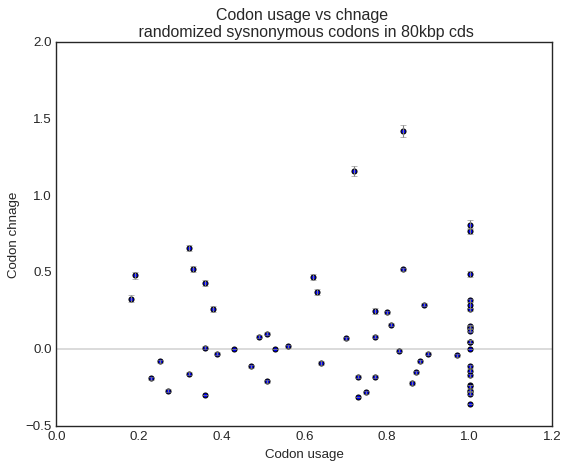

In [178]:
plt.scatter(codon_usage, change_mean)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.errorbar(codon_usage, change_mean, yerr = np.array(change_se), ecolor = "grey", ls = "None")
plt.title("Codon usage vs chnage \n randomized sysnonymous codons in 80kbp cds")
plt.ylabel("Codon chnage")
plt.xlabel("Codon usage")
plt.savefig("Plots/Codon-Usage_2020_08_14_proportional_change.png")

In [179]:
def adj_mut_calc(dna): 
    """
    string --> float 
    takes a TRIPLET
    calulates the mutability for ALL POSSIBLE triplets (equal weights) adjacent 
    """
    muts_leftadj = []
    muts_rightadj = []
    #piece for triplet -1 relative index 
    piece_leftadj = dna[0:2]
    for base in ["A", "T", "G", "C"]: 
        triplet_leftadj = base+piece_leftadj
        if triplet_leftadj in model: 
            muts_leftadj.append(model[triplet_leftadj][0])
        else: 
            muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])
#     #for triplets -2 relative index         
#     piece_leftadj =  dna[0:1]
#     for base1 in ["A", "T", "G", "C"]: 
#         for base2 in ["A", "T", "G", "C"]: 
#             triplet_leftadj = base1+base2+piece_leftadj
#             if triplet_leftadj in model: 
#                 muts_leftadj.append(model[triplet_leftadj][0])
#             else: 
#                 muts_leftadj.append(model[reverse_complement(triplet_leftadj)][0])
#     #for triplets +1 reltive index 
    piece_rightadj = dna[1:3]
    for base in ["A", "T", "G", "C"]: 
        triplet_rightadj = piece_rightadj+base 
        if triplet_rightadj in model: 
            muts_rightadj.append(model[triplet_rightadj][0])
        else: 
            muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])
#     #for triplets +2 relative index         
#     piece_rightadj =  dna[2:3]
#     for base1 in ["A", "T", "G", "C"]: 
#         for base2 in ["A", "T", "G", "C"]: 
#             triplet_rightadj =piece_rightadj+base1+base2
#             if triplet_rightadj in model: 
#                 muts_rightadj.append(model[triplet_rightadj][0])
#             else: 
#                 muts_rightadj.append(model[reverse_complement(triplet_rightadj)][0])

    return (np.mean(muts_leftadj+muts_rightadj))


In [186]:
codon_adjMut = []
for codon in codons: 
    codon_adjMut.append(adj_mut_calc(codon))
    

In [184]:
codons_turnFromTripletMut = []
bases = ['T', 'C', 'A', 'G']

for triplet in codons: 

    current_weight_mut =[]

    for middle_base in bases: 

        from_triplet = triplet[0]+middle_base+triplet[2]

        if from_triplet != triplet: 

            current_mut = model[from_triplet][0]
            current_prob = model[from_triplet][1][triplet]
            
            current_weight_mut.append(current_mut*current_prob)
            
    codons_turnFromTripletMut.append(np.mean(current_weight_mut))

In [187]:
codon_mut = []
for codon in codons: 
    codon_mut.append(model[codon][0])

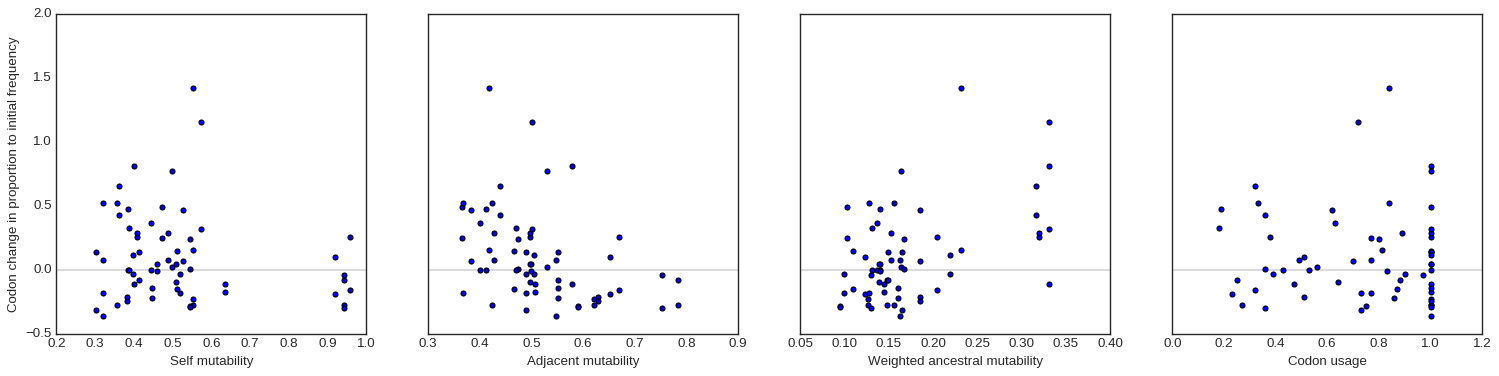

In [196]:
fig, (ax1,ax2, ax3,ax4) = plt.subplots(1,4,sharey=True, figsize=(23,5))

#fig.figsize = [5, 20]

ax1.scatter(codon_mut,  change_mean)
#ax1.set_title( "Self mutability on codon chnage")
ax1.set_ylabel("Codon change in proportion to initial frequency")
ax1.set_xlabel("Self mutability")
ax1.axhline(y = 0, linewidth = 0.25, color = "k")
ax2.scatter(codon_adjMut,  change_mean)
#ax2.set_title( "Adj mutability on codond chnage \n (+1/-1 only, left AND right averaged)")
ax2.set_xlabel("Adjacent mutability")
ax2.axhline(y = 0, linewidth = 0.25, color = "k")
ax3.scatter(codons_turnFromTripletMut,  change_mean)
#ax3.set_title( "Weighted mutability of codons \n that turn into this codon ")
ax3.set_xlabel("Weighted ancestral mutability")
ax3.axhline(y = 0, linewidth = 0.25, color = "k")
ax4.scatter(codon_usage,  change_mean)
#ax4.set_title("codon usage")
ax4.set_xlabel("Codon usage")
ax4.axhline(y = 0, linewidth = 0.25, color = "k")
#a5 = axs[4].scatter(triplet_muts_intron, triplet_chnage_mean_intron)

plt.savefig("CodonUsage_scatters_summary_2020_08_14.png")

In [197]:
import pandas as pd
from sklearn import linear_model

In [198]:
def normalize_list(list_tmp):
    """
    takes in a numeric list, outputs the normalized list 
    """
    normalized_list = []
    for element in list_tmp: 
        normalized_list.append(element/max(list_tmp))
        
    return(normalized_list)
        

In [200]:
codon_mut_norm = normalize_list(codon_mut)
codon_adjMut_norm = normalize_list(codon_adjMut)
codons_turnFromTripletMut_norm = normalize_list(codons_turnFromTripletMut)
codon_usage_norm = normalize_list(codon_usage)

In [201]:
regression_multiplearray = []
for (a, b, c,d) in zip(codon_mut_norm,codon_adjMut_norm ,codons_turnFromTripletMut_norm, codon_usage_norm): 
     regression_multiplearray.append([a,b,c,d])
        
regression_multiplearray = np.array(regression_multiplearray)

In [204]:
regr_model= linear_model.LinearRegression().fit(regression_multiplearray, np.array(change_mean))
r_squared = regr_model.score(regression_multiplearray, np.array(change_mean))
print(r_squared)

0.44373125331


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [205]:
regr_model.coef_

array([ 0.66305282, -1.72633177,  0.88997436, -0.03598591])